In [387]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [389]:
df = pd.read_csv('ViewingActivity.csv')

In [391]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Ana,2025-04-02 03:54:13,00:40:54,NaN,Judge Dee's Mystery: Season 1: Episode 9,NaN,Comcast X1 ARM 4K MVPD STB,00:41:11,00:41:11,CA (Canada)
1,Ana,2025-04-02 03:01:26,00:42:27,NaN,Judge Dee's Mystery: Season 1: Episode 8,NaN,Comcast X1 ARM 4K MVPD STB,00:42:28,00:42:28,CA (Canada)
2,Ana,2025-04-01 21:15:48,00:00:08,Autoplayed: user action: None;,The Untamed: Season 1_hook_04_16x9,HOOK,Comcast X1 ARM 4K MVPD STB,00:00:08,00:00:08,CA (Canada)
3,Ana,2025-04-01 03:45:50,00:00:12,Autoplayed: user action: None;,Judge Dee's Mystery: Season 1: Episode 8,NaN,Comcast X1 ARM 4K MVPD STB,00:00:29,Not latest view,CA (Canada)
4,Ana,2025-04-01 02:46:20,00:37:55,NaN,Judge Dee's Mystery: Season 1: Episode 7,NaN,Comcast X1 ARM 4K MVPD STB,00:39:23,00:39:23,CA (Canada)


In [393]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df['Duration'] = df['Duration'].dt.total_seconds()
df['Duration'] = df['Duration'].astype(int)

In [395]:
df.shape

(15545, 10)

In [397]:
df = df[df['Profile Name'].isin(['Ana', 'Daniel'])]

In [399]:
df.shape

(15382, 10)

In [401]:
df['Device Type'], device_labels = pd.factorize(df['Device Type'])

In [405]:
df

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Ana,2025-04-02 03:54:13,2454,NaN,Judge Dee's Mystery: Season 1: Episode 9,NaN,0,00:41:11,00:41:11,CA (Canada)
1,Ana,2025-04-02 03:01:26,2547,NaN,Judge Dee's Mystery: Season 1: Episode 8,NaN,0,00:42:28,00:42:28,CA (Canada)
2,Ana,2025-04-01 21:15:48,8,Autoplayed: user action: None;,The Untamed: Season 1_hook_04_16x9,HOOK,0,00:00:08,00:00:08,CA (Canada)
3,Ana,2025-04-01 03:45:50,12,Autoplayed: user action: None;,Judge Dee's Mystery: Season 1: Episode 8,NaN,0,00:00:29,Not latest view,CA (Canada)
4,Ana,2025-04-01 02:46:20,2275,NaN,Judge Dee's Mystery: Season 1: Episode 7,NaN,0,00:39:23,00:39:23,CA (Canada)
...,...,...,...,...,...,...,...,...,...,...
15377,Daniel,2023-05-12 05:30:49,6,NaN,NoGlobalVideo-CannotLocalize-81167708-en,HOOK,3,00:00:06,00:00:06,CA (Canada)
15378,Daniel,2023-05-12 05:30:47,2,NaN,Breaking Bad: Season 1: The Cat's in the Bag (...,NaN,7,00:00:02,Not latest view,CA (Canada)
15379,Daniel,2023-05-12 05:30:30,3,NaN,Breaking Bad: Season 1: The Cat's in the Bag (...,NaN,7,00:00:03,Not latest view,CA (Canada)
15380,Daniel,2023-05-12 05:28:53,32,NaN,Breaking Bad: Season 1: The Cat's in the Bag (...,NaN,3,00:00:31,Not latest view,CA (Canada)


In [407]:
features = ['Duration', 'Device Type']
x = df[features]
y = df['Profile Name'].replace({'Ana': 0, 'Daniel': 1})

d:\Daniel\AppData\Local\Temp\ipykernel_23140\257711937.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df['Profile Name'].replace({'Ana': 0, 'Daniel': 1})


In [411]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.30, random_state = 0)
model = LogisticRegression(random_state = 0)

In [413]:
model.fit(train_x, train_y)

LogisticRegression(random_state=0)

In [415]:
predictions = model.predict(test_x)
accuracy = accuracy_score(test_y, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In [417]:
print(classification_report(test_y, predictions, target_names=['Ana','Daniel']))

              precision    recall  f1-score   support

         Ana       0.80      0.64      0.71       346
      Daniel       0.97      0.99      0.98      4269

    accuracy                           0.96      4615
   macro avg       0.89      0.81      0.84      4615
weighted avg       0.96      0.96      0.96      4615



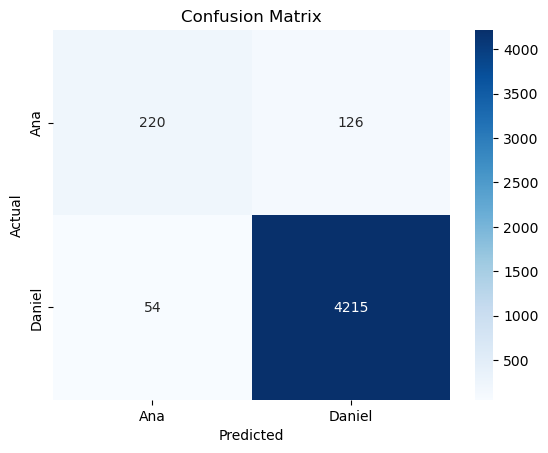

In [419]:
cm = confusion_matrix(test_y, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ana','Daniel'], yticklabels=['Ana','Daniel'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

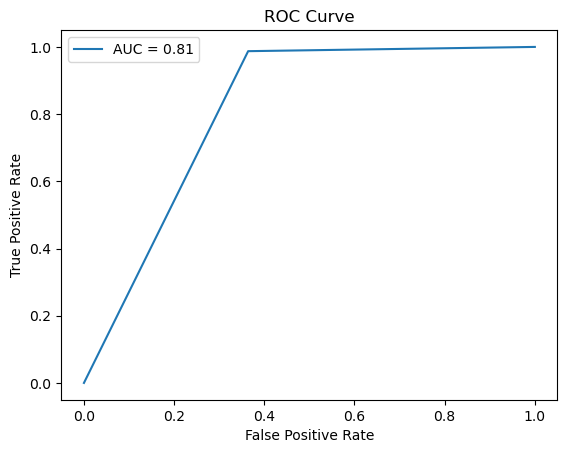

In [421]:
fpr, tpr, thresholds = roc_curve(test_y, predictions)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()